In [1]:
import networkx as nx
import csv
import pandas as pd

fIn = open("stormofswords.csv", "r")
G = nx.Graph()
csvreader = csv.reader(fIn)

nodeset = set()
ln = 0
for row in csvreader:
    ln+=1
    if (ln == 1):
        continue
    for i in range(2):
        n = row[i]
        if (not n in nodeset):
            nodeset.add(n)
            G.add_node(n)
    G.add_edge(row[0], row[1], weight=int(row[2]))

,degree,eigenvector,closeness,betweeness
0,Tyrion(0.33962264150943394),Tyrion(0.33663766254996313),Tyrion(0.5120772946859904),Jon(0.22996466368473173)
1,Jon(0.24528301886792453),Sansa(0.27878188816602195),Sansa(0.5096153846153846),Robert(0.2094523840293194)
2,Sansa(0.24528301886792453),Jaime(0.27366303653172797),Robert(0.5),Tyrion(0.19791284320277353)
3,Robb(0.2358490566037736),Cersei(0.24644869607730555),Robb(0.48847926267281105),Daenerys(0.15720345212054956)
4,Jaime(0.22641509433962265),Robb(0.2448454761557984),Arya(0.48623853211009177),Robb(0.1269644713830151)
...,...,...,...,...
102,Lancel(0.009433962264150943),Karl(0.0014192979620201859),Karl(0.25),Ramsay(0.0)
103,Ramsay(0.009433962264150943),Cressen(0.0011422440283831998),Cressen(0.25),Chataya(0.0)
104,Shireen(0.009433962264150943),Salladhor(0.0011422440283831998),Salladhor(0.25),Shireen(0.0)
105,Doran(0.009433962264150943),Shireen(0.0011422440283831998),Shireen(0.25),Doran(0.0)


<Figure size 432x288 with 0 Axes>

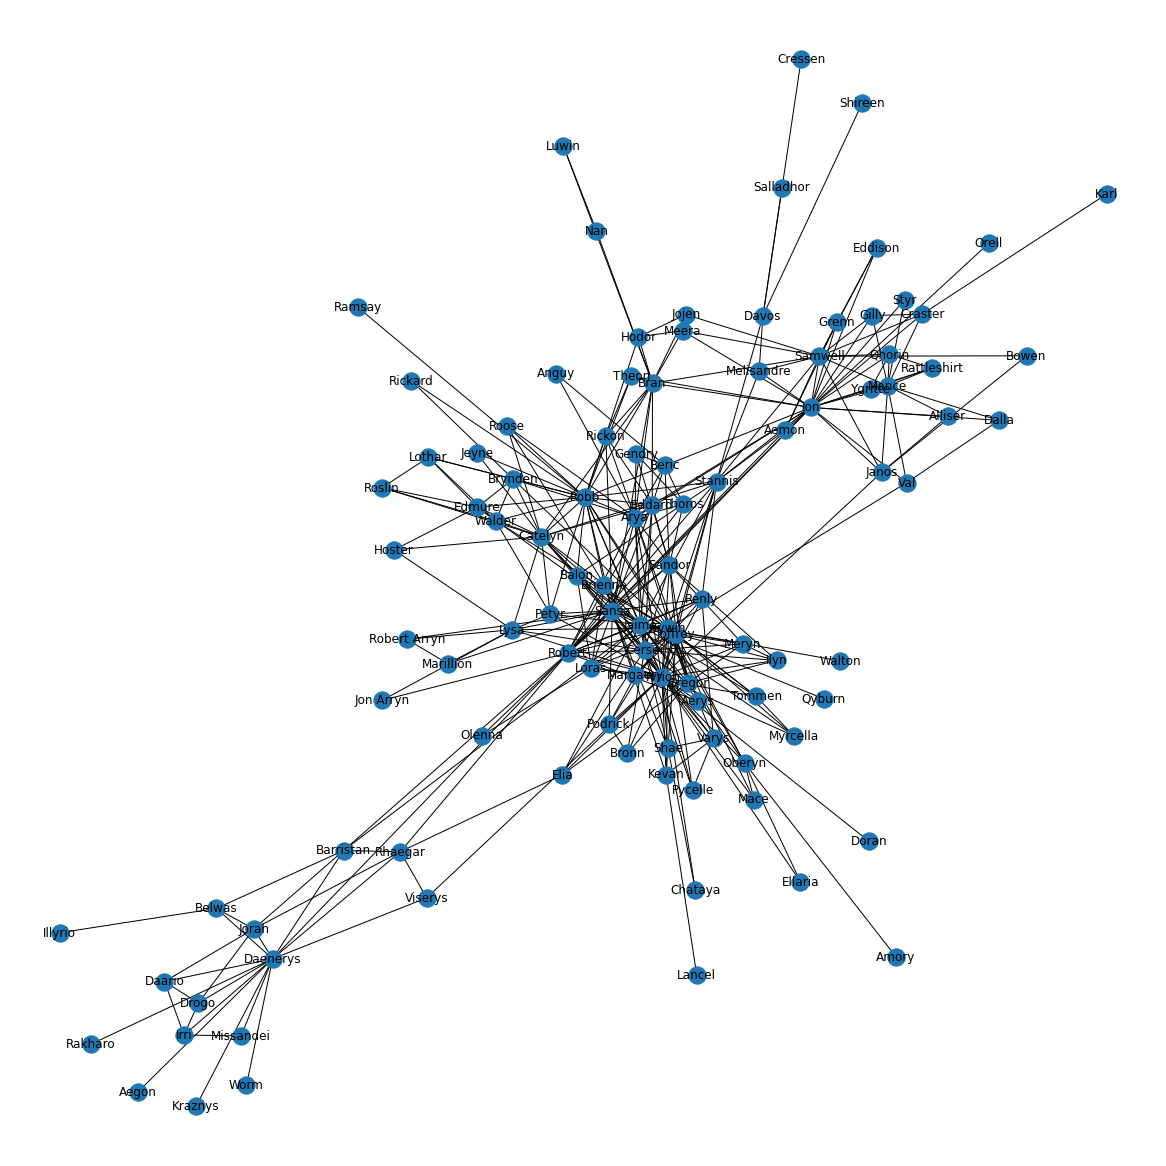

In [11]:
import matplotlib.pyplot as plt
plt.figure(2)
 
# larger figure size
plt.figure(3,figsize=(16,16)) 
nx.draw(G, with_labels = True)

In [4]:
# create & sort by greatest to least
deg = nx.degree_centrality(G)
eigen = nx.eigenvector_centrality(G)
close = nx.closeness_centrality(G)
between = nx.betweenness_centrality(G)

ldeg = list(dict(sorted(deg.items(), key=lambda item: item[1], reverse = True)))
leigen = list(dict(sorted(eigen.items(), key=lambda item: item[1], reverse = True)))
lclose = list(dict(sorted(close.items(), key=lambda item: item[1], reverse = True)))
lbetween = list(dict(sorted(between.items(), key=lambda item: item[1], reverse = True)))

column_names = ["degree", "eigenvector", "closeness", "betweeness"]
df = pd.DataFrame(columns = column_names)
for i in range(len(ldeg)):
    row = [ldeg[i] + "(" + str(deg[ldeg[i]]) + ")",
               leigen[i] + "(" + str(eigen[leigen[i]]) + ")",
               lclose[i] + "(" + str(close[lclose[i]]) + ")",
               lbetween[i] + "(" + str(between[lbetween[i]]) + ")"]
    df.loc[len(df)] = row

In [12]:
df.head(10)

,degree,eigenvector,closeness,betweeness
0,Tyrion(0.33962264150943394),Tyrion(0.33663766254996313),Tyrion(0.5120772946859904),Jon(0.22996466368473173)
1,Jon(0.24528301886792453),Sansa(0.27878188816602195),Sansa(0.5096153846153846),Robert(0.2094523840293194)
2,Sansa(0.24528301886792453),Jaime(0.27366303653172797),Robert(0.5),Tyrion(0.19791284320277353)
3,Robb(0.2358490566037736),Cersei(0.24644869607730555),Robb(0.48847926267281105),Daenerys(0.15720345212054956)
4,Jaime(0.22641509433962265),Robb(0.2448454761557984),Arya(0.48623853211009177),Robb(0.1269644713830151)
5,Tywin(0.20754716981132074),Joffrey(0.23065949393794508),Jaime(0.4796380090497738),Sansa(0.12672031668498004)
6,Cersei(0.18867924528301885),Tywin(0.2248558363286332),Jon(0.4796380090497738),Stannis(0.1026998617273264)
7,Arya(0.1792452830188679),Arya(0.22293108897418834),Stannis(0.4796380090497738),Jaime(0.09994344156136246)
8,Robert(0.16981132075471697),Robert(0.19958752278264225),Tywin(0.4690265486725664),Arya(0.07960711308183888)
9,Joffrey(0.16981132075471697),Catelyn(0.19248526173555658),Eddard(0.4608695652173913),Tywin(0.06553840423231058)
